Step 1: download data directly from kaggle

In [ ]:
# Install Kaggle API
!pip install kaggle

# Set up Kaggle API credentials directly
import os
os.environ['KAGGLE_USERNAME'] = "kushagragaur"
os.environ['KAGGLE_KEY'] = "5b2816f7bf90a681e42c9989817f00c4"

# Download the dataset
!kaggle datasets download -d rm1000/brain-tumor-mri-scans

# Unzip the downloaded dataset
!unzip brain-tumor-mri-scans.zip -d brain_tumor_mri_scans

Streaming output truncated to the last 5000 lines.
  inflating: brain_tumor_mri_scans/healthy/0402.jpg  
  inflating: brain_tumor_mri_scans/healthy/0403.jpg  
  inflating: brain_tumor_mri_scans/healthy/0404.jpg  
  inflating: brain_tumor_mri_scans/healthy/0405.jpg  
  inflating: brain_tumor_mri_scans/healthy/0406.jpg  
  inflating: brain_tumor_mri_scans/healthy/0407.jpg  
  inflating: brain_tumor_mri_scans/healthy/0408.jpg  
  inflating: brain_tumor_mri_scans/healthy/0409.jpg  
  inflating: brain_tumor_mri_scans/healthy/0410.jpg  
  inflating: brain_tumor_mri_scans/healthy/0411.jpg  
  inflating: brain_tumor_mri_scans/healthy/0412.jpg  
  inflating: brain_tumor_mri_scans/healthy/0413.jpg  
  inflating: brain_tumor_mri_scans/healthy/0414.jpg  
  inflating: brain_tumor_mri_scans/healthy/0415.jpg  
  inflating: brain_tumor_mri_scans/healthy/0416.jpg  
  inflating: brain_tumor_mri_scans/healthy/0417.jpg  
  inflating: brain_tumor_mri_scans/healthy/0418.jpg  
  inflating: brain_tumor_mri_sc

Import important modules

In [ ]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the directory path
base_dir = 'brain_tumor_mri_scans'

Preprocessing the data and preparing model by retraining the mobilenet  model

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Base directory for your dataset
base_dir = 'brain_tumor_mri_scans'

# Prepare the data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load the pre-trained MobileNetV2 model + higher level layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model
base_model.trainable = False

# Create a new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer for the number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # You can increase this later
)

# Save the retrained model
model.save('brain_tumor_classifier_mobilenet.h5')

Found 5619 images belonging to 4 classes.
Found 1404 images belonging to 4 classes.


<ipython-input-29-b0bf744a1b36>:39: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 171s 937ms/step - accuracy: 0.7268 - loss: 0.7002 - val_accuracy: 0.8576 - val_loss: 0.3966
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.4714 - val_accuracy: 0.7500 - val_loss: 0.4329
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 164s 929ms/step - accuracy: 0.8502 - loss: 0.3903 - val_accuracy: 0.8169 - val_loss: 0.4541
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.3706 - val_accuracy: 0.7857 - val_loss: 0.5284
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 199s 917ms/step - accuracy: 0.8549 - loss: 0.3763 - val_accuracy: 0.8663 - val_loss: 0.3521
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.3575 - val_accuracy: 0.8571 - val_loss: 0.2117
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 204s 936ms/step - accuracy: 0.8645 - loss: 0.3464 - val_accuracy: 0.8685 - val_loss: 0.3723
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━

Save model

In [37]:
model.save('brain_tumor_classifier_mobilenet.keras')

Load images to perform predictions for testing purpose

In [69]:
# Get a batch of validation images and labels
validation_images, validation_labels = next(validation_generator)

# Make predictions on the validation images
predictions = model.predict(validation_images)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class indices
true_classes = np.argmax(validation_labels, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


Prediction and visualization of predictions

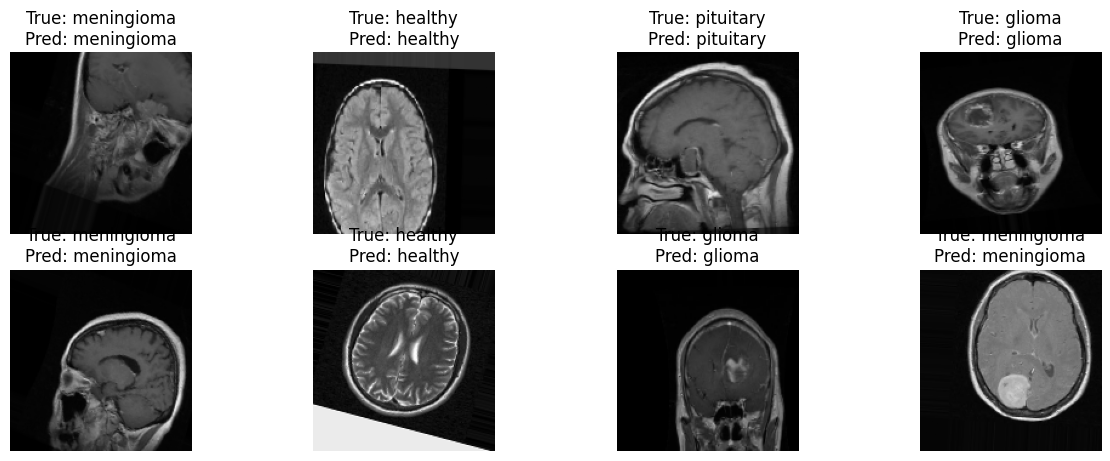

In [71]:
# Create a list of class labels from class_indices
class_labels = list(validation_generator.class_indices.keys())

# Function to plot images with predictions and true labels
def plot_predictions(images, true_labels, predicted_labels, class_labels, ncols=4):
    plt.figure(figsize=(15, 8))
    for i in range(len(images)):
        plt.subplot(len(images) // ncols + 1, ncols, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_labels[true_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}')
        plt.axis('off')
    plt.show()

# Plot the first 8 validation images with predictions
plot_predictions(validation_images[:8], true_classes, predicted_classes, class_labels)

Making a confusing matrix

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

44/44 ━━━━━━━━━━━━━━━━━━━━ 34s 760ms/step - accuracy: 0.8814 - loss: 0.3128
Validation Loss: 0.3242
Validation Accuracy: 0.8739


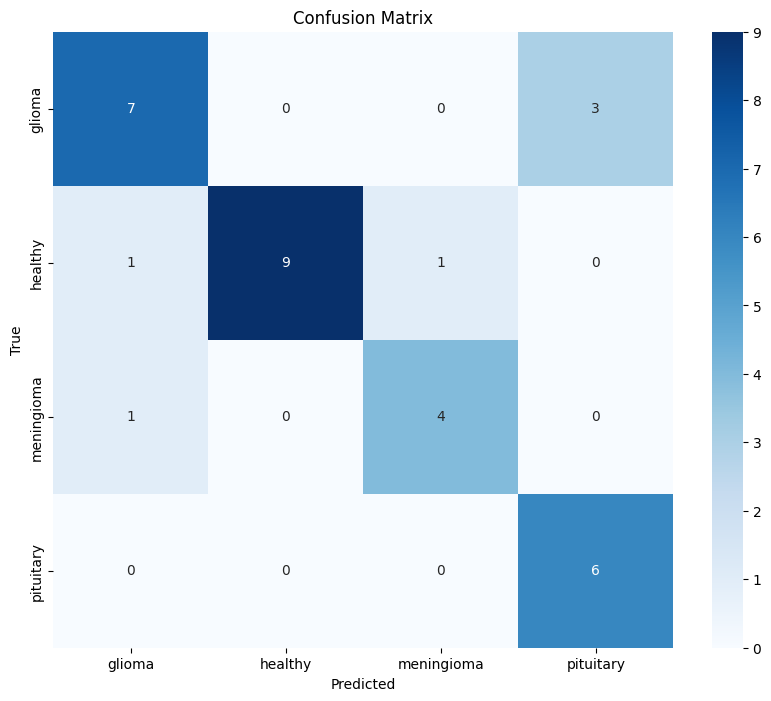

In [72]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Generate the confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d',
            xticklabels=class_labels,
            yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Complete end to end code

Found 5619 images belonging to 4 classes.
Found 1404 images belonging to 4 classes.


<ipython-input-53-92d071774fda>:45: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


175/175 ━━━━━━━━━━━━━━━━━━━━ 169s 931ms/step - accuracy: 0.7338 - loss: 0.6789 - val_accuracy: 0.8554 - val_loss: 0.3833
Epoch 2/10
  1/175 ━━━━━━━━━━━━━━━━━━━━ 1:17 447ms/step - accuracy: 0.8125 - loss: 0.3767

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8125 - loss: 0.3767 - val_accuracy: 0.6786 - val_loss: 0.6760
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 199s 917ms/step - accuracy: 0.8566 - loss: 0.3702 - val_accuracy: 0.8714 - val_loss: 0.3458
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.4357 - val_accuracy: 0.8214 - val_loss: 0.4058
Epoch 5/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 200s 910ms/step - accuracy: 0.8611 - loss: 0.3623 - val_accuracy: 0.8779 - val_loss: 0.3110
Epoch 6/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9474 - loss: 0.2229 - val_accuracy: 0.8929 - val_loss: 0.3110
Epoch 7/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 202s 913ms/step - accuracy: 0.8827 - loss: 0.3144 - val_accuracy: 0.8794 - val_loss: 0.3052
Epoch 8/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9062 - loss: 0.3128 - val_accuracy: 0.8929 - val_loss: 0.2632
Epoch 9/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 200s 909ms/step - accuracy: 0.8788 - loss: 0.3128 - val_accurac

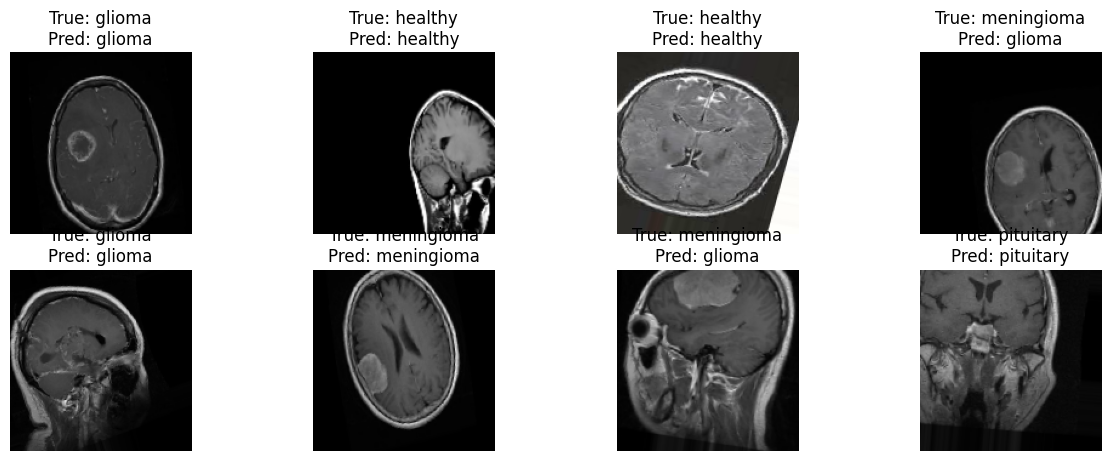

44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 730ms/step - accuracy: 0.8776 - loss: 0.3081
Validation Loss: 0.2921
Validation Accuracy: 0.8811


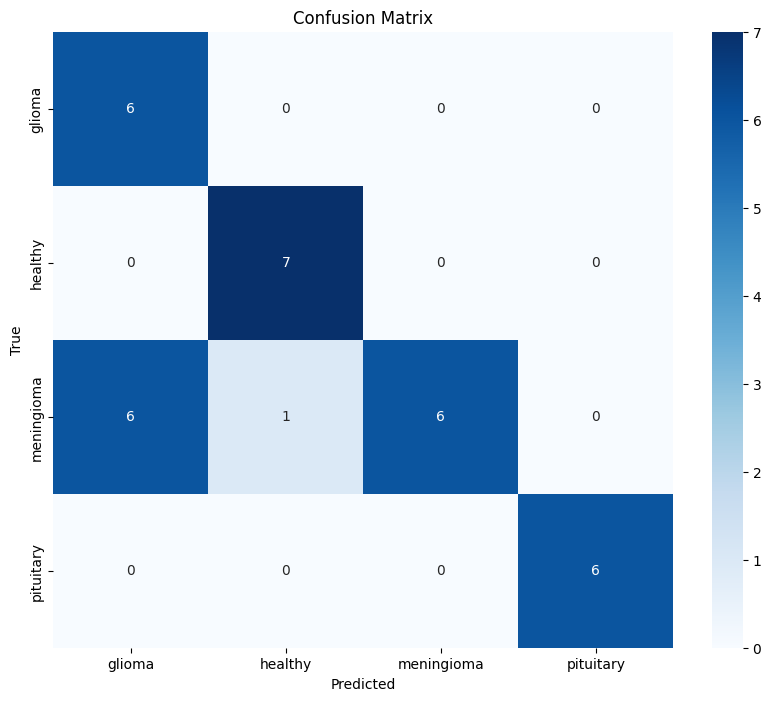

In [53]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Base directory for your dataset
base_dir = 'brain_tumor_mri_scans'

# Prepare the data generators with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images in the range (degrees, 0 to 20)
    width_shift_range=0.2,  # Randomly shift images horizontally (20% of total width)
    height_shift_range=0.2,  # Randomly shift images vertically (20% of total height)
    shear_range=0.2,  # Shear intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,  # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images
    fill_mode='nearest',  # Fill in new pixels
    validation_split=0.2  # Reserve 20% of data for validation
)

# Create training and validation generators
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,  # Number of images to be yielded from the generator per batch
    class_mode='categorical',  # Use categorical labels
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,  # Number of images to be yielded from the generator per batch
    class_mode='categorical',  # Use categorical labels
    subset='validation'  # Set as validation data
)

# Load the pre-trained MobileNetV2 model + higher level layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model to prevent weight updates
base_model.trainable = False

# Create a new model on top of the pre-trained base
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Global average pooling layer
    layers.Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer for number of classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Adjust epochs as needed
)

# Save the retrained model in .keras format
model.save('brain_tumor_classifier_mobilenet.keras')

# Get a batch of validation images and labels
validation_images, validation_labels = next(validation_generator)

# Make predictions on the validation images
predictions = model.predict(validation_images)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class indices
true_classes = np.argmax(validation_labels, axis=1)

# Create a list of class labels from class_indices
class_labels = list(validation_generator.class_indices.keys())

# Function to plot images with predictions and true labels
def plot_predictions(images, true_labels, predicted_labels, class_labels, ncols=4):
    plt.figure(figsize=(15, 8))
    for i in range(len(images)):
        plt.subplot(len(images) // ncols + 1, ncols, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_labels[true_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}')
        plt.axis('off')
    plt.show()

# Plot the first 8 validation images with predictions
plot_predictions(validation_images[:8], true_classes, predicted_classes, class_labels)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Generate the confusion matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d',
            xticklabels=class_labels,
            yticklabels=class_labels, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


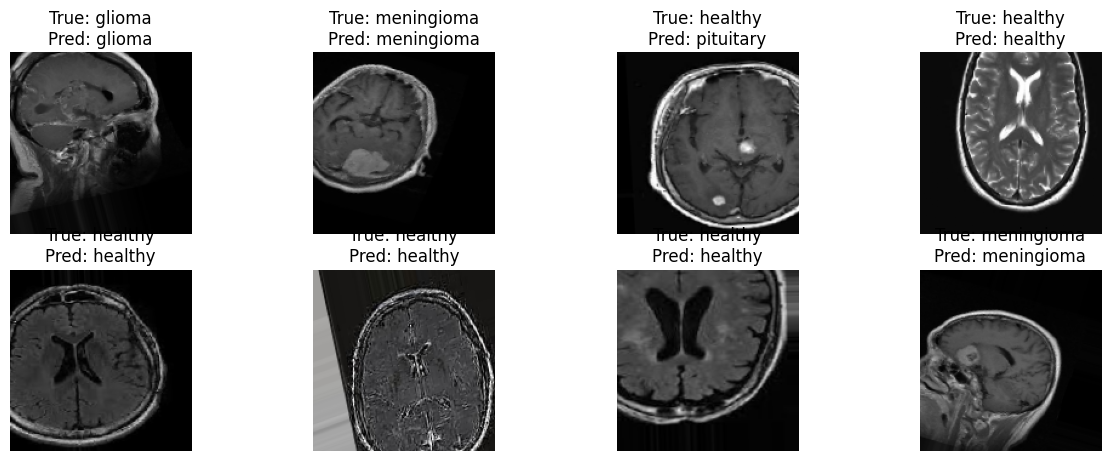

In [65]:
validation_images, validation_labels = next(validation_generator)

# Make predictions on the validation images
predictions = model.predict(validation_images)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class indices
true_classes = np.argmax(validation_labels, axis=1)

# Create a list of class labels from class_indices
class_labels = list(validation_generator.class_indices.keys())

# Function to plot images with predictions and true labels
def plot_predictions(images, true_labels, predicted_labels, class_labels, ncols=4):
    plt.figure(figsize=(15, 8))
    for i in range(len(images)):
        plt.subplot(len(images) // ncols + 1, ncols, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {class_labels[true_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}')
        plt.axis('off')
    plt.show()

# Plot the first 8 validation images with predictions
plot_predictions(validation_images[:8], true_classes, predicted_classes, class_labels)

#